# Training Models

### Linear Regression

A linear regression model "makes a prediction by simply computing a weighted sum of the input features, plus a constant called the *bias term* (also called the *intercept term*)"

y_hat = theta_0 + theta_1\*x1 + theta_2\*x2 + theta_3\*x3 + ... + theta_n\*xn

A vectorized form of this is:

y_hat = h(x) = theta DOT x

h(x) is called the hypothesis function that uses the model parameters (weights) theta.

*Important note:*
"In Machine Learning, vectors are often represented as *column vectors*, which are 2D arrays with a single column. If theta and x are column vectors, then the prediction is:

y_hat = matrix_mult(theta_transposed,x)

Now, all we have to do is find the values of theta that minimize the cost function. There are two ways we can go about this, the **Normal Equation** or **Gradient Descent**

#### The Normal Equation

There is a *closed-form solution* or a mathematical equation that gives the result directly, known as the Normal Equation:

theta_hat = (matrix_mult(x_transposed,x))^-1  x_transposed  y

Let's test this in python:

In [61]:
import numpy as np

x = 2 * np.random.rand(100,1)
y = 4 + 3*x + np.random.randn(100,1)

(0, 2)

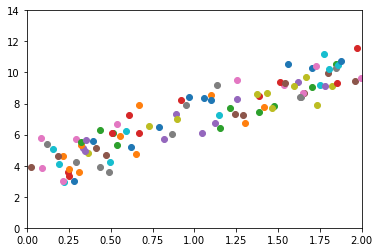

In [62]:
import matplotlib.pyplot as plt

%matplotlib inline
[plt.scatter(x,y) for x,y in zip(x,y)]
plt.ylim([0,14])
plt.xlim([0,2])

In [63]:
# We need to add x0=1 to each instance
x_b = np.c_[np.ones((100,1)),x]
# Let's apply the normal equation
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
theta_best

array([[3.7512291 ],
       [3.36400186]])

There we have our answer, and since this is a linear model and not a polynomial one, we only have a theta_0 and theta_1.
Now let's make a prediction.

In [64]:
x_new = np.array([[0],[2]])
# Add in bias
x_new_b = np.c_[np.ones((2,1)), x_new]
y_predict = x_new_b.dot(theta_best)
y_predict

array([[ 3.7512291 ],
       [10.47923282]])

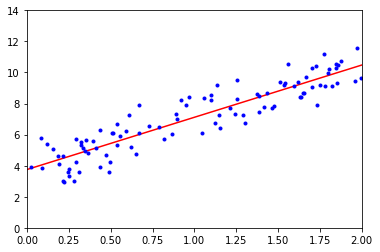

In [65]:
#[plt.scatter(x,y, c='k') for x,y in zip(x,y)]
plt.ylim([0,14])
plt.xlim([0,2])
plt.plot(x_new, y_predict, 'r-')
plt.plot(x,y, 'b.')

In [66]:
# Doing LinearRegression right from sklearn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)
lin_reg.intercept_, lin_reg.coef_

(array([3.7512291]), array([[3.36400186]]))

#### Computational Complexity

The Normal Equation has to compute the inverse of x_transposed \* x. Such a task has a computational complexity of O(n^2.4)~O(n^3). This means that a large number of features or instances will slow this down to a halt quickly.

The solution to this issue is **Gradient Descent**.

### Gradient Descent

"The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function," starting with theta being filled with random values.

Issues like local minimums and plateaus arise in finding the global minimum all the time, but luckily, a linear model has a *convex* cost function.

To implement Gradient Descent, we need to compute the gradient of the cost function, or the partial derivative of each theta_j.

If we are dealing with mean squared error, then the partial derivative is:

(2/m) sigma(1,m, (matrix_mult(theta_transposed,x) - y) x_j).

Ok, it's a little hard to write here so just consult the book if you need the formulas.

The issue with "Batch" Gradient Descent is that it uses every instance in the dataset to take a step. This does not scale well with a large dataset.

"Once you have the gradient vector, which points uphill, just go in the opposite direction to go downhill. This means subtracting the gradient from the theta vector. This is where the learning rate comes into play: multiply the gradient vector by lr to determine the size of the downhill step."

In [67]:
lr = .1
n_iter = 1000
m = 100

theta = np.random.randn(2,1) # Random initialization
for iteration in range(n_iter):
    gradients = (2/m) * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - lr * gradients
theta

array([[3.7512291 ],
       [3.36400186]])

This is the exact result that we got from the Normal Equation. Now let's try altering the learning rate and see how it performs.

Text(0.5,1,'lr=.5')

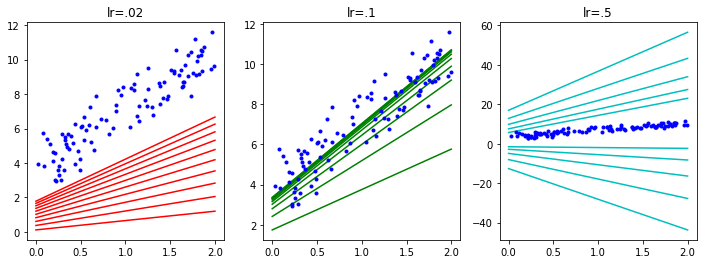

In [68]:
def get_thetas(lr=.1):
    theta = np.random.randn(2,1) # Random initialization
    best_thetas = []
    for iteration in range(10):
        gradients = (2/m) * x_b.T.dot(x_b.dot(theta) - y)
        theta = theta - lr * gradients
        best_thetas.append(theta)
    return best_thetas

def plot_theta(theta, color='r-'):
    x_new = np.array([[0],[2]])
    x_new_b = np.c_[np.ones((2,1)), x_new]
    y_predict = x_new_b.dot(theta)
    plt.plot(x_new,y_predict,color)
    
plt.figure(figsize=(12,4))
plt.subplot(131)
[plot_theta(theta, color='r-') for theta in get_thetas(lr=.02)]
plt.plot(x,y, 'b.')
plt.title('lr=.02')
plt.subplot(132)
[plot_theta(theta, color='g-') for theta in get_thetas(lr=.1)]
plt.plot(x,y, 'b.')
plt.title('lr=.1')
plt.subplot(133)
[plot_theta(theta, color='c-') for theta in get_thetas(lr=.5)]
plt.plot(x,y, 'b.')
plt.title('lr=.5')

#### Stochastic Gradient Descent
"The main problem with Batch Gradient Descent is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large. At the opposite extreme, **Stochastic Gradient Descent** just picks a random instance in the training set at every step and computes the gradients based only on that single instance."

The randomness of this kind of gradient descent is kind of a good thing. It may allow the algorithm to jump out of local minima. However, it will never converge and will just continuously jump around close to the minimum.

A simple solution to this "jumping around close to the minimum" is to apply a learning schedule:

In [69]:
n_epochs = 50
t0, t1 = 5, 50 # Learning schedule parameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = x_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        lr = learning_schedule(epoch * m + i)
        theta = theta - lr * gradients

theta

array([[3.76412465],
       [3.37438735]])

#### Mini-batch Gradient Descent
Mini-batch GD is the in-between of Batch GD and Stochastic GD. Instead of using the gradient of all instances or one instance, we use a set number, given by the batch_size. "The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.

Because batch_size is larger in Mini-batch GD, the convergence to the minimum is less sporatic, but it is also less likely to "jump out" of a local minimum.

### Polynomial Regression

(-3, 3)

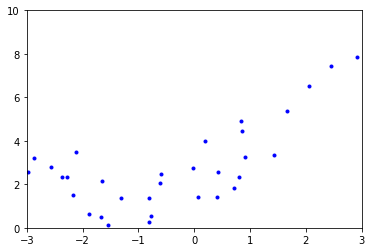

In [70]:
m = 100
x = 6 * np.random.randn(m,1) - 3
y = 0.5 * x**2 + x + 2 + np.random.randn(m,1)

plt.plot(x,y, 'b.')
plt.ylim([0,10])
plt.xlim([-3,3])

"Clearly a straight line will never fit this data properly." But we can still use a regular LinearRegression by using "Scikit-Learn's `PolynomialFeatures` class to transform our training data, adding the square (2nd degree polynomial) of each feature in the training set as new features.

In [71]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)
x[0]

array([-16.20366537])

In [72]:
x_poly[0]

array([-16.20366537, 262.5587713 ])

"x_poly now contains the original feature of x plus the square of this feature. Now you can fit a `LinearRegression` model to this extended training data:"

In [73]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.88561114]), array([[0.98264364, 0.50119385]]))

"Note that when there are multiple features, Polynomial Regression is capable of finding relationships between features (which is something a plain Linear Regression model cannot do). This is made possible by the fact that `PolynomialFeatures` also adds all combinations of features up to the given degree. For example, if there were two features a and b, `PolynomialFeatures` with degree=3 would not only add the features a^2, a^3, b^2, b^3, but also the combinations ab, a^2b, and ab^2."

"`PolynomialFeatures(degree=d)` transforms an array containing n features into an array containing (n+d)!/(d!n!)," which can get big fast.

#### Learning Curves
If you use a high degree Polynomial Regression, you have a higher chance of overfitting the training data. If you use a low degree Polynomial Regression, you have a higher chance of underfitting the data. How do we decide how complex our model should be?

One way is to use cross-validation "to get an estimate of a model's generalization performance. If a model performs well on the training data but generalizes poorly according to the cross-validation metrics, then your model is overfitting. If it performs poorly on both, then it is underfitting."

"Another way is to look at the **learning curves**: these are plots of the model's performance on the training set and the validation set as a function of the training set size (or the training iteration). To generate the plots, simply train the model several times on different sized subsets of the training set. The followng code defines a function that plots the learning curves of a model given some training data:"

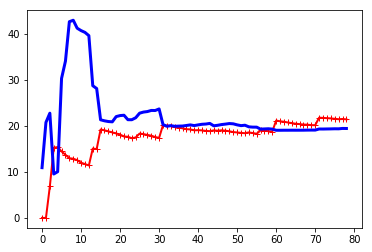

In [74]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, x, y):
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(x_train)):
        model.fit(x_train[:m], y_train[:m])
        y_train_predict = model.predict(x_train[:m])
        y_val_predict = model.predict(x_val[:m])
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val[:m], y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
    
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, x, y)

"These learning curves are typical of an underfitting model. Both curves have reached a plateau; they are close and fairly high."

Now let's look at the learning curves of a 10th-degree polynomial model on the same data:

(0, 3)

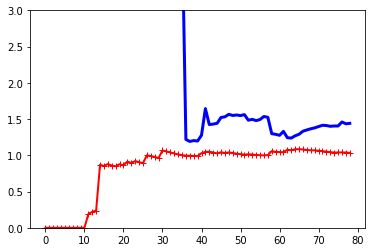

In [75]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])

plot_learning_curves(polynomial_regression, x, y)
plt.ylim([0,3])

"These learning curves look a bit like the previous ones, but there are two very important differences:
1. The error on the training data is much lower than with the Linear Regression model.
2. There is a gap between the curves. This means that the model performs significantly better on the training data than on the validation data, which is the hallmark of an overfitting model. However, if you used a much larger training set, the two curves would continue to get closer."

### Regularized Linear Models
A good way to reduce overfitting a model is to regularize it: "the fewer degrees of freedom it has, the harder it will be for it to overfit the data." Not too surprisingly, " a simple way to regularize a polynomial model is to reduce the number of polynomial degrees.

"For a linear model, regularization is typically achieved by constraining the weights of the model. We will now look at **Ridge Regression**, **Lasso Regression**, and **Elastic Net**.

#### Ridge Regression
To implement **Ridge Regression**, we add the sum of all thetas(1-n)^2 (not including the bias term) times a scalar alpha to the end of the cost function. If alpha = 0, then the Ridge Regression is just a Linear Regression. Increasing it will force the weights to be smaller and thus will reduce overfitting.

J(theta) = MSE(theta) + alpha * sum(1,n,theta_i^2)

**Important note:** "It is important to scale the data (e.g., using a `StandardScaler`) before performing Ridge Regression, as it is sensitive to the scale of the input features. This is true of most regularized models.

Just like standard Linear Regression, Ridge Regression has a closed-form solution as well with the same pros and cons to using it. We can implement it from sklearn like so:

In [76]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(x,y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='cholesky', tol=0.001)

We can also use gradient descent:

In [77]:
from sklearn.linear_model import SGDRegressor
# penalty=l2 means that we want SGD to add a regularization term equal to half the square of the l2 norm of the weight vector
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(x, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

#### Lasso Regression
**Lasso Regression** or *Least Absolute Shrinkage and Selection Operator Regression* "is another regularized version of Linear Regression: just like Ridge Regression, it adds a regularization term to the cost function, but it uses the l1 norm of the weight vector instead of half the square of the l2 norm.

"An important characteristic of Lasso Regression is that it tends to completely eliminate the weights of the least important features (i.e., set them to zero)... in other words, Lasso Regression automatically performs feature selection and outputs a *sparse model*.

In [78]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x,y)
lasso_reg.predict([[1.5]])

array([13.54607873])

#### Elastic Net
"Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso's regularization terms, and you can control the mix ratio r."

"So when should you use plain Linear Regression, Ridge, Lasso, or Elastic Net? It is almost always preferable to have at least a little bit of regularization, so generally you should avoid plain Linear Regression. Ridge is a good default, but if you suspect that only a few features are actually useful, you should prefere Lasso or Elastic Net since they tend to reduce the useless features' weights down to zero... In general, Elastic Net is prefered over Lasso since Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated."

In [79]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(x,y)
elastic_net.predict([[1.5]])

array([13.55095746])

### Early Stopping

Another simple way of regularization on iterative learning algorithms such as Gradient Descent is called **Early Stopping**. The idea of early stopping is to simply end the training process as soon as the validation cost reaches a minimum. If training continued after this point, the model would simply overfit.

In [85]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

# prepare the data
poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)), # degree=90 will make it overfit really quickly
    ('std_scaler', StandardScaler())
])
x_train_poly_scaled = poly_scaler.fit_transform(x_train)
x_val_poly_scaled = poly_scaler.transform(x_val) # important to not call fit_transform here

sgd_reg = SGDRegressor(max_iter=10, warm_start=True, penalty=None, learning_rate='constant', eta0=0.0005)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(x_train_poly_scaled, y_train.ravel())
    y_val_predict = sgd_reg.predict(x_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

C:\Users\Tim\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Tim\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Tim\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Tim\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Tim\Anaconda3\lib\site-packages\sklearn

C:\Users\Tim\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Tim\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Tim\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Tim\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Tim\Anaconda3\lib\site-packages\sklearn

## Logistic Regression
Some regression algorithms could be used as classifiers as well. **Logistic Regression** (based on the sigmoid function) is commonly used to estimate the probability that an instance belongs to a particular class. If >= 50%, assign to class 1, else assign to class 0. This makes it a binary classifier.

#### Estimating Probabilities

"So how does it work? Just like a Linear Regression model, a Logistic Regression model computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the Linear Regression model does, it outputs the *logistic* of this result."

#### Training and Cost Function

This is all well and good, but how do we go about training this kind of model? Well, "the objective of training is to set the parameter vector theta so that the model estimates high probabilities for positive instances... and low probabilities for negative instances. The cost function of a single instance **x** is:

c(theta) = -log(p_hat) if y = 1
c(theta) = -log(1 - p_hat) if y = 0

"The cost function over the whole training sset is simply the average cost over all training instances."

"The bad news is that there is no known closed-form equation to compute the value of theta that minimizes this cost function... but the good news is that this cost function is convex," so Gradient Descent is easy as pie.

#### Decision Boundaries

Let's use the iris dataset to test Logistic Regression. "Let's try to build a classifier to detect the Iris-Virginica type based only on the petal width feature. First let's load the data:

In [86]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [87]:
x = iris['data'][:,3:]
y = (iris['target'] == 2).astype(np.int)

Now let's train a Logistic Regression model:

In [88]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x,y)

C:\Users\Tim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

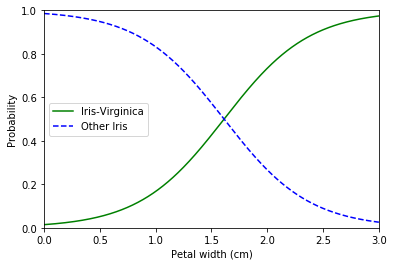

In [93]:
x_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(x_new)
f = plt.plot(x_new, y_proba[:,1], 'g-', label='Iris-Virginica')
g = plt.plot(x_new, y_proba[:,0], 'b--', label='Other Iris')
plt.ylim([0,1])
plt.ylabel('Probability')
plt.xlim([0,3])
plt.xlabel('Petal width (cm)')
plt.legend(loc='center left')

#### Softmax Regression
"The Logistic Regression model can be generalized to support multiple classes directly, without having to train and combine multiple binary classifiers... This is called **Softmax Regression** or **Multinomial Logistic Regression**.

The idea is quite simple: when given an instance xi, the Softmax Regression model first computes a score s(x) for each class k, then estimates the probability of each class by applying the **softmax function** (also called the **normalized exponential**) to the scores."

Then the prediction is just the class with the highest probability (which is simply the class with the highest score).

"Let's use Softmax Regression to classify the iris flowers into all three classes. Scikit-Learn's `LogisticRegression` uses one-versus-all by default when you train it on more than two classes, but you can set the `multi_class` hyperparameter to '`multinomial`' to switch it to Softmax Regression instead. You must also specify a solver that supports Softmax Regression, such as the '`lbfgs`' solver."

In [94]:
x = iris['data'][:,(2,3)] # petal length, petal width
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10) # C is l2 regularization
softmax_reg.fit(x,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [95]:
softmax_reg.predict([[5,2]]), softmax_reg.predict_proba([[5,2]])

(array([2]), array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]]))